## فراخوانی کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## درباره داده ها

این داده ها مربوط به 5000 شرکت کننده در یک نظر سنجی با ثبت قد و نمره ای با عنوان نمره ی سلامتی که بر اساس یک سری پارامتر ها به آن ها داده شده است می باشد. خروجی این مسئله وضعیت سلامتی گوش آن ها می باشد. این که از نظر شنوایی دچار مشکل هستند یا خیر
<br>

ایا راهی برای پیشبینی وضعیت سلامتی گوش افراد با مشخص نمودن سن و وضعیت سلامتی آن ها وجود دارد؟ 
* Features

    * سن
    * نمره سلامتی که با توجه به یک تست خاص ورزشی به آن ها اختصاص پیدا کرده است

* Label/Target

    * صفر به معنی رد شدن در آزمون سلامت گوش و یک به معنی سلامت گوش

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Exploratory Data Analysis and Visualization

به عنوان اولین قدم سعی می کنم در داده ها کاوش کنیم و به یک دانش عمومی نسبت به آن ها برسیم 

متوجه می شویم که 5000 داده داریم و هیچ یک از آن ها نال نیستند همچنین با انواع مختلف هر یک از آن ها آشنا می شیم

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


با توجه به صفر و یک بودن ستون آخر، مقادیر تعیین شده خیلی مهم نیستند اما راجع به ستون اول می توانیم اطلاعات اولیه آماری را دریافت کنیم. به عنوان مثال سن های ثبت شده بین 18 تا 90 سال هستند، میاینگین آن ها 51 سال است و با توجه به نزدیک بودن میانه و میانگین، به نظر می رسد داده های پرت خیلی زیادی نداریم

In [34]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


با این کار پراکندگی داده های مربوط به خروجی مون احصا میشه، برای درک راحت تر می تونیم این پراکندگی رو رسم کنیم

In [35]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

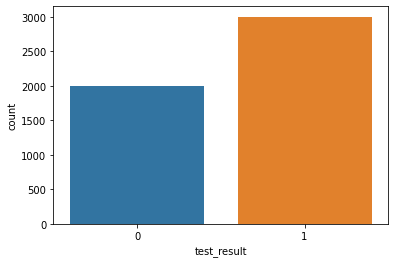

In [36]:
sns.countplot(data=df,x='test_result')

باکس پلات همیشه به ما کمک می کنه که توزیع یک متغیر گسسته رو در مقابل یک متغیر پیوسته مشاهده کنیم. از این نمودار تا حدودی مشخص میشه که عموما در سن های بالاتر، ضعف گوش بیشتر اتفاق می افته. همچنین داده های پرت زیادی نداریم و توزیع مناسبی نسبت به داده ها وجود داره

<AxesSubplot:xlabel='test_result', ylabel='age'>

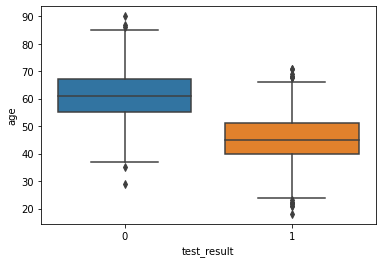

In [37]:
sns.boxplot(x='test_result',y='age',data=df)

به صورت مشابه می تونیم ارتباط مستقیم بین بالاتر بودن نمره فیزیکی فرد با افزایش احتمال سالم بودن تست شنوایی او رو مشاهده کنیم

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

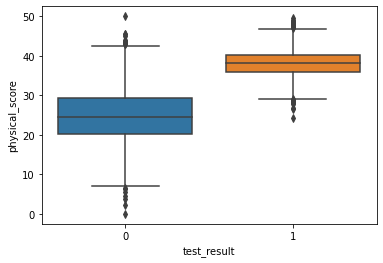

In [38]:
sns.boxplot(x='test_result',y='physical_score',data=df)

**معمولا در مسائل کلاسیفیکیشن باید بتونیم تمییزی بین داده ها در شرایط مختلف رو به تصویر بیاریم. برای این منظور استفاده از پارامتر چهارم یا هیو، خیلی می تونه به ما کمک کنه**

<br>

با این نمودار متوجه رابطه معکوس بین دو متغیر ورودی میشیم. همچنین متوجه وجود دو دسته متفاوت در دل این ارتباط هستیم
<br>

**دقت کنید، ما با مصور سازی فهمیدیم رابطه معکوسی بین این دو متغیر وجود داره، بنابرین بعد از پیاده سازی مدل، باید انتظار این رو داشته باشیم که پارامتر های به دست اومده برای این دو نیز رابطه معکوسی با هم داشته باشن، مثلا یکی مثبت و دیگری منفی باشه**

<AxesSubplot:xlabel='age', ylabel='physical_score'>

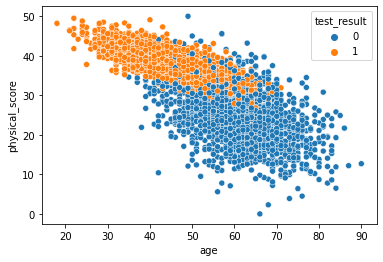

In [39]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

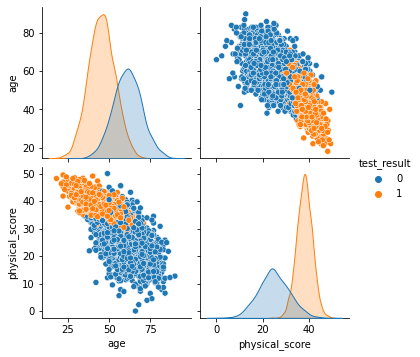

In [40]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

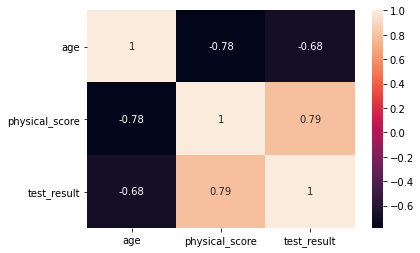

In [41]:
sns.heatmap(df.corr(),annot=True)

شکل زیر هم به نوعی به ما می فهمونه که مسئله از نوع کلاسیفیکیشن هست و خروجی و ورودی های شما رو به راحتی نمیشه با یک خط تفسیر کرد

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

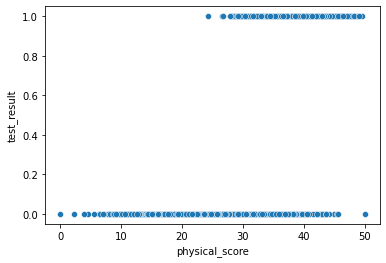

In [42]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

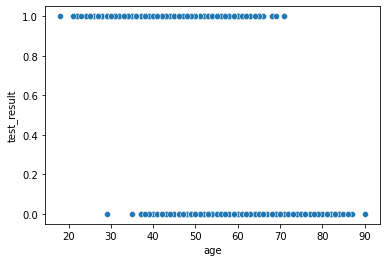

In [43]:
sns.scatterplot(x='age',y='test_result',data=df)

چون اینجا دو متغیر ورودی و یک متغیر خروجی داریم، می تونیم تصویر اون رو رسم کنیم و از وجود دسته های مختلف در مسئله مون اطمینان حاصل کنیم

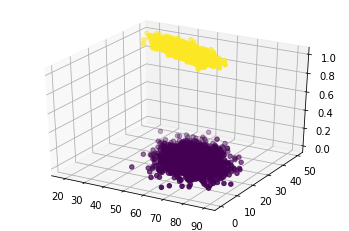

In [5]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

### تعیین متغیر های ورودی و خروجی


In [10]:
X = df.drop('test_result',axis=1)
y = df['test_result']

### Train | Test Split and Scaling


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [13]:
scaler = StandardScaler()


یادمون هست که برای نرمال کردن داده ها، فقط روی داده های ترین، فیت میشه و سپس روی هر دو ترنسفرم و این کار برای جلو گیری از 
<br>
ِ**DataLeakage**
<br> 
هست


In [26]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model
## پیاده سازی و ترین کردن مدل

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# help(LogisticRegression)

In [29]:

# help(LogisticRegressionCV)


دقت داشته باشین که داخل این مدل می تونیم پارامتر مربوط به رگولاریزیشن رو هم اعمال کنیم

In [30]:
log_model = LogisticRegression()

In [31]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

با مشاهده ضرایب مدل متوجه رابطه معکوسی که پیشتر و با مصور سازی تا حدودی به آن آگاه شده بودیم می شویم. بنابرین احتمالا مدلمون داره درست کار می کنه

In [33]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [36]:
X_train.head(1)

,age,physical_score
141,32.0,43.0


پس با افزایش سن، شانش 1 شدن متغیر خروجی کاهش و با افزایش امتیاز فیزیکی، این شانس افزایش پیدا می کنه

### اطمینان از کارکرد صحیح مدل

در مسائل کلاسیفیکیش با توجه به جنس متغیر خروجی مون نمیتونیم از شاخص هایی که در مسائل رگرسیون ازشون استفاده می کردیم استفاده کنیم

برای اطمینان از کارکرد صحیح مدل های مربوط به کلاسیفیکیشن، ماتریسی با نام کانفیوژن ماتریس، رسم و از روی اون به یک سری شاخص های دیگه 
می رسیم که در ادامه با مهمترین شون آشنا می شیم
<br>

**confusion matrix** 
<br>
tp|fp
<br>
fn|tn
<br>

**Accuracy**
<br>
یعنی مدل چند درصد مواقع داره درست پیشبینی می کنه. اما لزوما شاخص مناسبی نیست! چرا؟ فرض کنین خروجی هاتون بالانس نباشن. یعنی مثلا 95 نفر سرطان نداشته باشن و 5 نفر داشته باشن. حتی اگر شما نتونین اون 5 نفر رو درست تشخیص بدین، بازم این شاخصتون 95 درصد میشه در صورتی که مدلتون افتضاح کار می کنه پس باید به سراغ شاخص های بهتری بریم
<br>
(tp+tn)/all

<br>

**Recall**
<br>
یعنی زمان هایی که واقعا طرف یک هست! چند درصدشون رو درست پیشبینی کردیم. 
<br>
tp/(tp+fn)


<br>

**Precision**
<br>
یعنی زمان هایی که ما یک پیشبینی کردیم، چند درصدشون واقعا یک هستن
<br>
tp/(tp+fp)
<br>


**F1-score**
<br>
تلفیقی از دو شاخص بالا هست و اگر به یک نزدیک باشه یعنی هر دو شاخص تقریبا دارن خوب عمل می کنن اما پایین بودنش لزوما به معنی بد بودن مدل نیست.
**بنا بر شرایط مسائل مختلف کلاسیفیکیشن، تفسیر های متفاوتی از خوب یا بد بودن هر یک از این شاخص ها می تواند وجود داشته باشد

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [39]:
y_pred = log_model.predict(scaled_X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.93

In [41]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

می تونیم ماتریس رو به صورت زیر هم رسم کنیم. خوبی این روش شکل زیباتر و عدم نیاز به پیشبینی مجزا هست. خودش داده های تست رو می گیره و پیشبینی رو برامون انجام میده

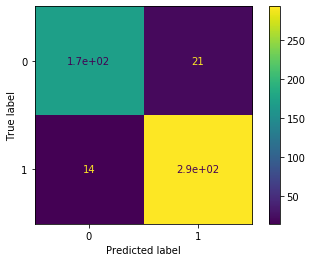

In [42]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

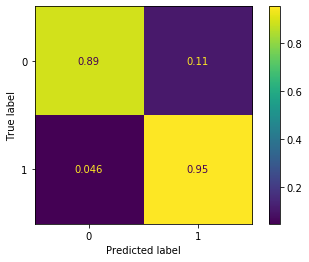

In [43]:
# همون ماتریس بالا ولی به صورت درصدی
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

شاخص های مهم را برای هر کلاس و به صورت مجزا بهمون ارایه می ده

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [45]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [64]:
y_train.iloc[0]

1

In [66]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

## aoc auc curve

معمولا برای تعیین حد یا مرز بین کلاس های مختلف درصدی تعیین می شود که معمولا نیم درصد است. با تغییر این حد ماتریس های متفاوتی و در نتیجه شاخص های متفاوتی تشکیل می گردد. نمودار 
<br>
**aoc**
<br>
در واقع رسم این شاخص های مختلف است با تغییر حدود. حد بهینه با توجه به مسئله های متفاوت، می تواند متفاوت باشد اما معمولا بالانسی بین شاخص های گوناگون برقرار است

<br>


**aoc curve**
<br>
نیز بیانگر مساحت زیر نمودار 
<br>
aoc
<br>
است که هر چه بیشتر باشد بهتر است. فرض کنیم از دو مدل مختلف برای یک مسئله استفاده و نمودار های هر دو را رسم می کنیم. هر چه این نمودار مساحت بیشتری داشته باشد یعنی مدل بهتر است


In [67]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

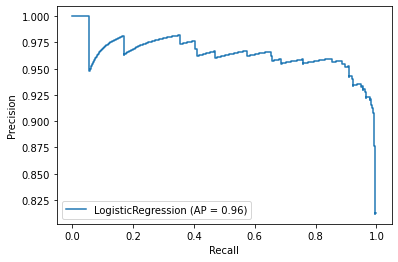

In [70]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

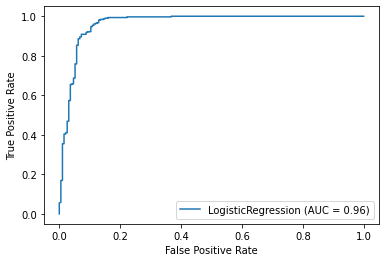

In [71]:
plot_roc_curve(log_model,scaled_X_test,y_test)

------
------